In [1]:
import pandas as pd
import numpy as np
Data = pd.read_csv("test.csv")

In [35]:
import sklearn.ensemble as ESB
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tqdm import tqdm,tqdm_notebook

best_parameter_and_model = []
best_score = []
nfold = 10
pbar = tqdm_notebook(total=nfold*10*10*10,initial=0,unit='para')
for k in range(8,9):
    score = 0
    column_list = [column for column in Data][2:]
    column_list
    a = []
    for i in range(k,366):
        b = [Data.iloc[i][1],Data.iloc[i]["27"]]
        for j in range(-k,0):
            temp = Data.iloc[i+j]
            for tcolumn in column_list:
                temp_column = temp[tcolumn]
                b.append(temp_column)
        a.append(b)
    test = pd.DataFrame(a)
    test

    y = test.iloc[:,1:2]
    x = test.iloc[:,2:]
    kf = KFold(n_splits = nfold, shuffle = True)

    for isplit, Ind in enumerate(kf.split(test)):
        Itr,Its = Ind
        xtr = x.values[Itr,:]
        xts = x.values[Its,:]

        ytr = y.values[Itr].ravel()
        yts = y.values[Its].ravel()
        for max_depth in range(12,13):
            for n_estimators in range (50,150,10):
                temp_parameter_and_model = []
                model = ESB.RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth)
                model.fit(xtr,ytr)
                yhat = model.predict(xts)
                mae = mean_absolute_error(yts,yhat)
                rmse = np.sqrt(mean_squared_error(yts,yhat))
                mse = mean_squared_error(yts,yhat)
                r2 = model.score(xts,yts) 
                temp_parameter_and_model.append(Itr)
                temp_parameter_and_model.append(Its)
                pbar.update(1)
                best_parameter_and_model.append(temp_parameter_and_model)
                best_score.append([yts,yhat,mae,rmse,mse,r2])     
pbar.close()
best_score          

C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_40932\1755881183.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm_notebook(total=nfold*10*10*10,initial=0,unit='para')


  0%|          | 0/10000 [00:00<?, ?para/s]

[[array([ 15846.,  21994.,  18928.,  15784.,  13147., 159763.,  35267.,
          31677.,  34786.,  46357.,  40278.,  20123.,  17304.,  42652.,
          31427.,  50202.,  53335.,  54191.,  56118.,  48803.,  51666.,
          37450.,  55700.,  43159.,  60010.,  49813.,  54257.,  57245.,
          58567.,  42774.,  27907.,  39155.,  52908.,  44975.,  33561.,
          33926.]),
  array([21143.44161111, 24592.76666667, 21524.339     , 18995.728     ,
         16306.27466667, 19482.925     , 26317.30466667, 27654.1165    ,
         28939.715     , 23566.717     , 35208.26      , 31233.1525    ,
         30431.192     , 27030.47333333, 36598.4       , 46520.5       ,
         53972.98752381, 51286.82572193, 48459.6292185 , 54949.24977694,
         51981.71647129, 50519.52372944, 59172.10813672, 47767.86733333,
         58287.8047619 , 50185.28572618, 49485.99741916, 45847.61300965,
         50944.98229825, 56433.91      , 51847.24489177, 53248.84333333,
         43670.64      , 39414.92960

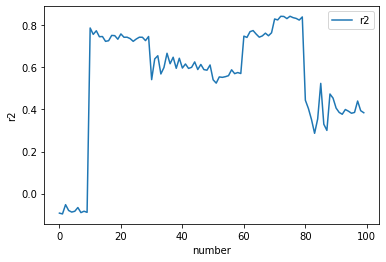

In [50]:
import matplotlib.pyplot as plt

#折线图
x = range(0,100)
best_score = np.array(best_score)
# print(np.shape(best_score[:,1][0:10]))
# plt.plot(x,best_score[:,2],label="mae")
# print(np.shape(best_score[:,3]))
# plt.plot(x,best_score[:,3],label="rmse")
plt.plot(x,best_score[:,5],label="r2")
# plt.plot(x,best_score[:,5],label="r2")
plt.xlabel("number")
plt.ylabel("r2")
plt.legend(loc = "best")
plt.show()

In [43]:
import sklearn.ensemble as ESB
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tqdm import tqdm,tqdm_notebook

best_parameter_and_model2 = []
best_score2 = []
nfold = 10
pbar = tqdm_notebook(total=nfold*10*10*10,initial=0,unit='para')
for k in range(8,9):
    score = 0
    column_list = [column for column in Data][2:]
    column_list
    a = []
    for i in range(k,366):
        b = [Data.iloc[i][1],Data.iloc[i]["27"]]
        for j in range(-k,0):
            temp = Data.iloc[i+j]
            for tcolumn in column_list:
                temp_column = temp[tcolumn]
                b.append(temp_column)
        a.append(b)
    test = pd.DataFrame(a)
    test

    y = test.iloc[:,1:2]
    x = test.iloc[:,2:]
    
    Itr,Its = Ind
    xtr = x.values[best_parameter_and_model[80][0],:]
    xts = x.values[best_parameter_and_model[80][1],:]

    ytr = y.values[best_parameter_and_model[80][0]].ravel()
    yts = y.values[best_parameter_and_model[80][1]].ravel()
    for max_depth in range(12,13):
        for n_estimators in range (50,150,1):
            temp_parameter_and_model2 = []
            model = ESB.RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth)
            model.fit(xtr,ytr)
            yhat = model.predict(xts)
            mae = mean_absolute_error(yts,yhat)
            rmse = np.sqrt(mean_squared_error(yts,yhat))
            mse = mean_squared_error(yts,yhat)
            r2 = model.score(xts,yts) 
            temp_parameter_and_model2.append(Itr)
            temp_parameter_and_model2.append(Its)
            pbar.update(1)
            best_parameter_and_model2.append(temp_parameter_and_model)
            best_score2.append([yts,yhat,mae,rmse,mse,r2])     
pbar.close()    

C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_40932\1507914468.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm_notebook(total=nfold*10*10*10,initial=0,unit='para')


  0%|          | 0/10000 [00:00<?, ?para/s]

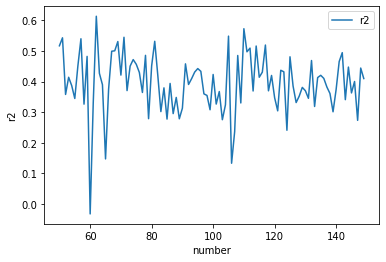

12


In [52]:
x = range(50,150)
best_score2 = np.array(best_score2)
# print(np.shape(best_score[:,1][0:10]))
# plt.plot(x,best_score[:,2],label="mae")
# print(np.shape(best_score[:,3]))
# plt.plot(x,best_score[:,3],label="rmse")
plt.plot(x,best_score2[:,5],label="r2")
# plt.plot(x,best_score[:,5],label="r2")
plt.xlabel("number")
plt.ylabel("r2")
plt.legend(loc = "best")
plt.show()
print(np.argmax(best_score2[:,5]))